https://learn.astropy.org/tutorials/2_user-defined-model.html

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.modeling import models, fitting
from astropy.modeling.models import custom_model
from astropy.modeling import Fittable1DModel, Parameter
from astroquery.sdss import SDSS

In [2]:
spectrum = SDSS.get_spectra(plate=1349, fiberID=216, mjd=52797)[0]
spectrum[1].columns

ColDefs(
    name = 'flux'; format = 'E'
    name = 'loglam'; format = 'E'
    name = 'ivar'; format = 'E'
    name = 'and_mask'; format = 'J'
    name = 'or_mask'; format = 'J'
    name = 'wdisp'; format = 'E'
    name = 'sky'; format = 'E'
    name = 'model'; format = 'E'
)

In [3]:
flux = spectrum[1].data["flux"]
lam = 10 ** (spectrum[1].data["loglam"])

# Units of the flux
units_flux = spectrum[0].header["bunit"]
print(units_flux)

# Units of the wavelegth
units_wavelength_full = spectrum[0].header["WAT1_001"]
print(units_wavelength_full)

units_wavelength = units_wavelength_full[36:]
print(units_wavelength)

1E-17 erg/cm^2/s/Ang
wtype=linear label=Wavelength units=Angstroms
Angstroms


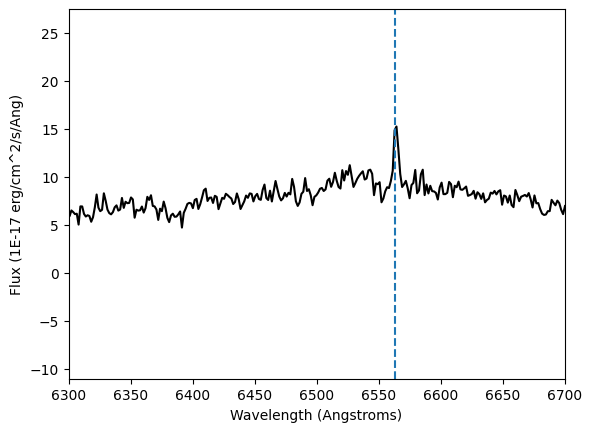

In [4]:
plt.plot(lam, flux, color="k")
plt.xlim(6300, 6700)
plt.axvline(x=6563, linestyle="--")
plt.xlabel("Wavelength ({})".format(units_wavelength))
plt.ylabel("Flux ({})".format(units_flux))
plt.show()

In [5]:
gausian_model = models.Gaussian1D(1, 6563, 10)
fitter = fitting.LevMarLSQFitter()
gaussian_fit = fitter(gausian_model, lam, flux)

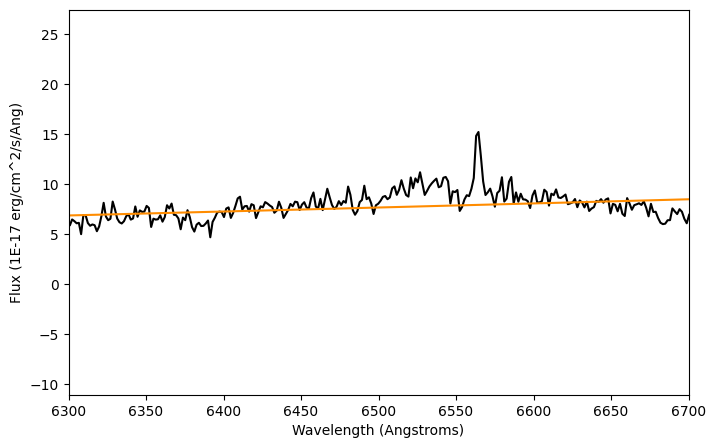

In [6]:
plt.figure(figsize=(8, 5))
plt.plot(lam, flux, color="k")
plt.plot(lam, gaussian_fit(lam), color="darkorange")
plt.xlim(6300, 6700)
plt.xlabel("Wavelength (Angstroms)")
plt.ylabel("Flux ({})".format(units_flux))
plt.show()

In [7]:
print(gaussian_fit)

Model: Gaussian1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
        amplitude            mean             stddev     
    ----------------- ----------------- -----------------
    16.75070628912542 9456.749530943964 2368.395706441934


In [10]:
compound_model = models.Gaussian1D(1, 6563, 10) + models.Polynomial1D(degree=1)
fitter = fitting.LevMarLSQFitter()
compound_fit = fitter(compound_model, lam, flux)

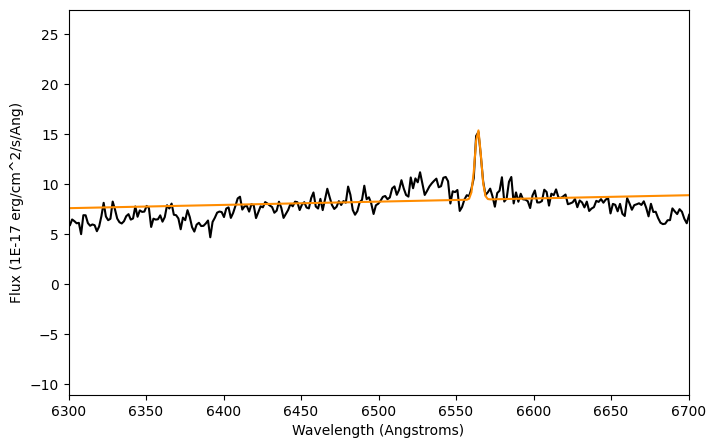

In [11]:
plt.figure(figsize=(8, 5))
plt.plot(lam, flux, color="k")
plt.plot(lam, compound_fit(lam), color="darkorange")
plt.xlim(6300, 6700)
plt.xlabel("Wavelength (Angstroms)")
plt.ylabel("Flux ({})".format(units_flux))
plt.show()

In [12]:
print(compound_fit)

Model: CompoundModel
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1]
Components: 
    [0]: <Gaussian1D(amplitude=7.02171248, mean=6564.13272082, stddev=1.97715531)>

    [1]: <Polynomial1D(1, c0=-12.79335637, c1=0.00323995)>
Parameters:
       amplitude_0          mean_0      ...          c1_1        
    ----------------- ----------------- ... ---------------------
    7.021712482642497 6564.132720819804 ... 0.0032399521966709533


In [13]:
for x, y in zip(compound_fit.param_names, compound_fit.parameters):
    print(x, y)

amplitude_0 7.021712482642497
mean_0 6564.132720819804
stddev_0 1.9771553116079954
c0_1 -12.793356368640708
c1_1 0.0032399521966709533


In [14]:
compound_fit.amplitude_0

Parameter('amplitude', value=7.021712482642497)

In [17]:
compound_model_fixed = models.Gaussian1D(1, 6563, 10) + models.Polynomial1D(degree=1)
compound_model_fixed.mean_0.fixed = True
fitter = fitting.LevMarLSQFitter()
compound_fit_fixed = fitter(compound_model_fixed, lam, flux)

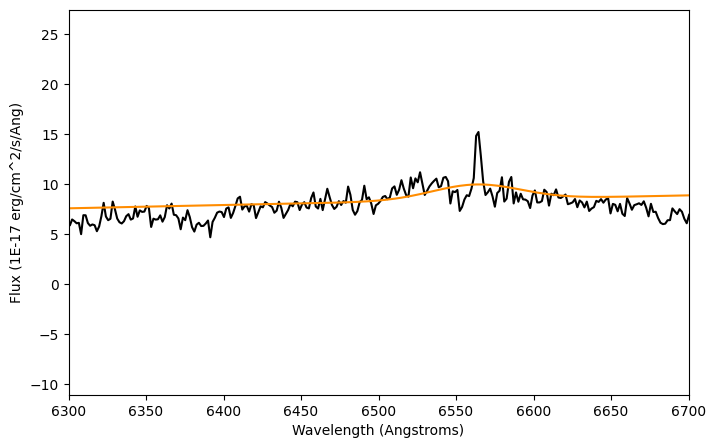

In [18]:
plt.figure(figsize=(8, 5))
plt.plot(lam, flux, color="k")
plt.plot(lam, compound_fit_fixed(lam), color="darkorange")
plt.xlim(6300, 6700)
plt.xlabel("Wavelength (Angstroms)")
plt.ylabel("Flux ({})".format(units_flux))
plt.show()

In [19]:
print(compound_fit_fixed)

Model: CompoundModel
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1]
Components: 
    [0]: <Gaussian1D(amplitude=1.53255901, mean=6563., stddev=28.5790691)>

    [1]: <Polynomial1D(1, c0=-12.79102997, c1=0.00323745)>
Parameters:
       amplitude_0    mean_0 ...         c0_1                c1_1        
    ----------------- ------ ... ------------------- --------------------
    1.532559014942836 6563.0 ... -12.791029966666521 0.003237448589422308


In [20]:
compound_model_bounded = models.Gaussian1D(1, 6563, 10) + models.Polynomial1D(degree=1)
delta = 0.5
compound_model_bounded.mean_0.max = 6563 + delta
compound_model_bounded.mean_0.min = 6563 - delta

fitter = fitting.LevMarLSQFitter()
compound_fit_bounded = fitter(compound_model_bounded, lam, flux)

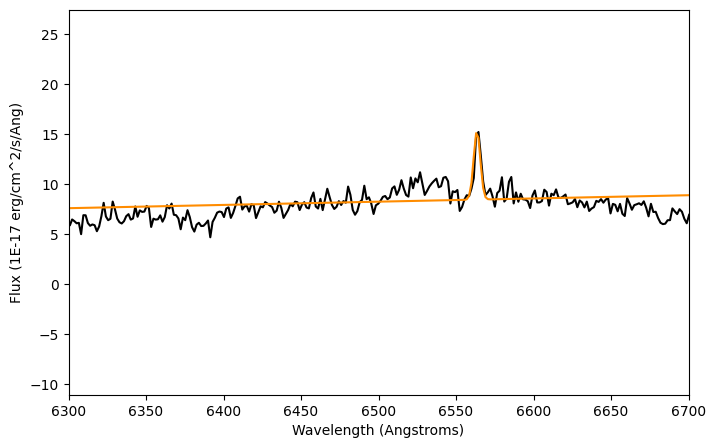

In [21]:
plt.figure(figsize=(8, 5))
plt.plot(lam, flux, color="k")
plt.plot(lam, compound_fit_bounded(lam), color="darkorange")
plt.xlim(6300, 6700)
plt.xlabel("Wavelength (Angstroms)")
plt.ylabel("Flux ({})".format(units_flux))
plt.show()

In [22]:
print(compound_fit_bounded)

Model: CompoundModel
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1]
Components: 
    [0]: <Gaussian1D(amplitude=6.86741863, mean=6563.5, stddev=2.12272132)>

    [1]: <Polynomial1D(1, c0=-12.79313621, c1=0.00323986)>
Parameters:
       amplitude_0    mean_0 ...         c0_1                c1_1        
    ----------------- ------ ... ------------------- --------------------
    6.867418626680307 6563.5 ... -12.793136208303801 0.003239857612230347


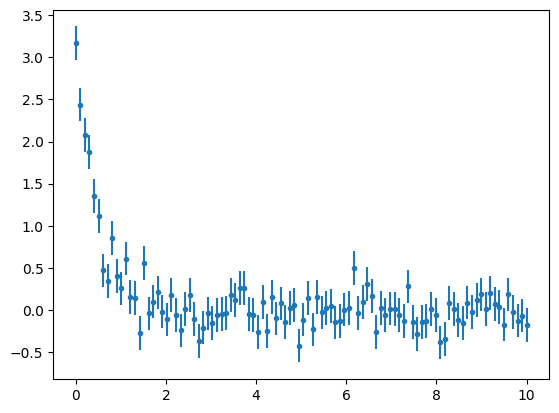

In [24]:
x1 = np.linspace(0, 10, 100)

a = 3
b = -2
c = 0
y1 = a * np.exp(b * x1 + c)
y1 += np.random.normal(0.0, 0.2, x1.shape)
y1_err = np.ones(x1.shape) * 0.2

plt.errorbar(x1, y1, yerr=y1_err, fmt=".")
plt.show()

In [25]:
@custom_model
def exponential(x, a=1.0, b=1.0, c=1.0):
    """
    f(x)=a*exp(b*x + c)
    """
    return a * np.exp(b * x + c)

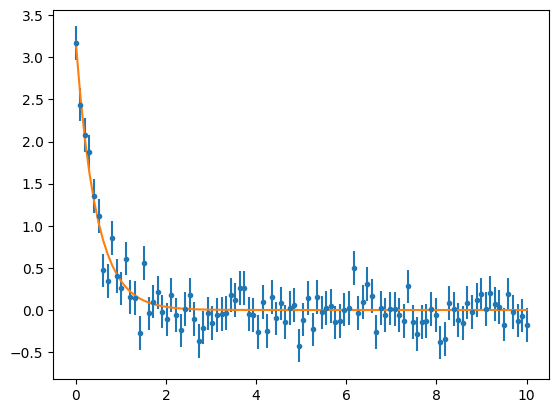

In [26]:
exp_model = exponential(1.0, -1.0, 1.0)
fitter = fitting.LevMarLSQFitter()
exp_fit = fitter(exp_model, x1, y1, weights=1.0 / y1_err**2)

plt.errorbar(x1, y1, yerr=y1_err, fmt=".")
plt.plot(x1, exp_fit(x1))
plt.show()

In [27]:
print(exp_fit)

Model: exponential
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
           a                  b                  c         
    ---------------- ------------------- ------------------
    1.20230097156969 -2.2190643705118496 0.9742583835263391


In [28]:
def calc_reduced_chi_square(fit, x, y, yerr, N, n_free):
    """
    fit (array) values for the fit
    x,y,yerr (arrays) data
    N total number of points
    n_free number of parameters we are fitting
    """
    return 1.0 / (N - n_free) * sum(((fit - y) / yerr) ** 2)

calc_reduced_chi_square(exp_fit(x1), x1, y1, y1_err, len(x1), 3)

np.float64(0.8493347959902136)

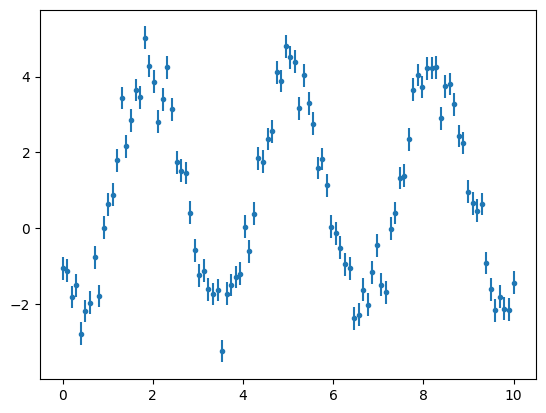

In [29]:
x2 = np.linspace(0, 10, 100)
a = 3
b = 2
c = 4
d = 1
y2 = a * np.sin(b * x2 + c) + d
y2 += np.random.normal(0.0, 0.5, x2.shape)
y2_err = np.ones(x2.shape) * 0.3

plt.errorbar(x2, y2, yerr=y2_err, fmt=".")
plt.show()

In [30]:
class SineNew(Fittable1DModel):
    a = Parameter(default=1.0)
    b = Parameter(default=1.0)
    c = Parameter(default=1.0)
    d = Parameter(default=1.0)

    @staticmethod
    def evaluate(x, a, b, c, d):
        return a * np.sin(b * x + c) + d

    @staticmethod
    def fit_deriv(x, a, b, c, d):
        d_a = np.sin(b * x + c)
        d_b = a * np.cos(b * x + c) * x
        d_c = a * np.cos(b * x + c)
        d_d = np.ones(x.shape)
        return [d_a, d_b, d_c, d_d]

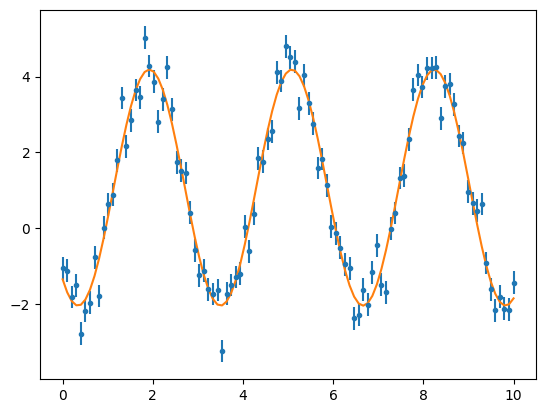

In [31]:
sine_model = SineNew(a=4.0, b=2.0, c=4.0, d=0.0)
fitter = fitting.LevMarLSQFitter()
sine_fit = fitter(sine_model, x2, y2, weights=1.0 / y2_err**2)

plt.errorbar(x2, y2, yerr=y2_err, fmt=".")
plt.plot(x2, sine_fit(x2))
plt.show()

In [32]:
print(sine_fit)

Model: SineNew
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
            a                  b                  c                 d         
    ------------------ ------------------ ----------------- ------------------
    3.1099832818897624 1.9883381747054136 4.031844890387218 1.0754149845981398


In [33]:
calc_reduced_chi_square(sine_fit(x2), x2, y2, y2_err, len(x2), 3)

np.float64(2.7285557181787095)

**Exercise**